# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [4]:
image = imread('data/picture.jpg')


In [5]:
# shape de la imagen
image.shape

(1728, 2304, 3)

In [6]:
# llama a la variable de la imagen, verás que es un array
image

array([[[141, 101,  76],
        [142, 102,  77],
        [143, 103,  78],
        ...,
        [203, 213, 222],
        [206, 214, 225],
        [196, 204, 215]],

       [[143, 103,  78],
        [144, 104,  79],
        [144, 104,  79],
        ...,
        [207, 217, 226],
        [205, 213, 224],
        [197, 205, 216]],

       [[146, 108,  85],
        [143, 105,  82],
        [142, 101,  79],
        ...,
        [210, 219, 228],
        [203, 210, 220],
        [198, 205, 215]],

       ...,

       [[ 36,  52,  78],
        [ 39,  55,  81],
        [ 36,  52,  78],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[ 33,  49,  75],
        [ 36,  52,  78],
        [ 35,  51,  77],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 36,  52,  78],
        [ 39,  55,  81],
        [ 34,  50,  76],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

In [7]:
# imprime las dimensiones de la imagen
len(image.shape), image.size
# imprime el tamaño de la imagen


(3, 11943936)

Muestra la imagen para ver que se ha cargado bien

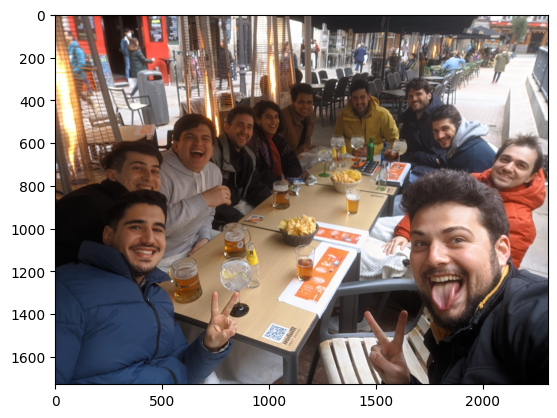

In [8]:
# muestra la imagen
# puedes utilizar plt.axis('off') para quitarle los ejes a la imagen;

plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

Forma original de la imagen: (1728, 2304, 3)
Nueva forma de la imagen: (3981312, 3)


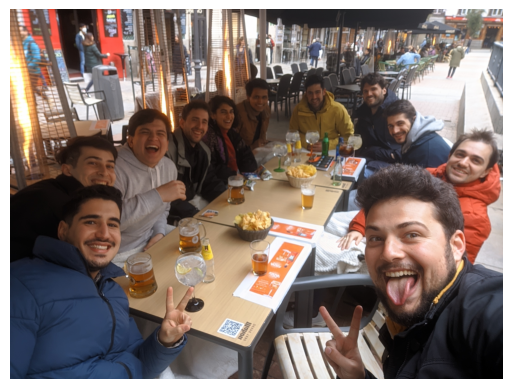

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Verificar la forma original de la imagen
print("Forma original de la imagen:", image.shape)

# Obtener las dimensiones de la imagen
alto, ancho, color = image.shape

# Transformar la imagen a la forma (alto * ancho, color)
imagen_transformada = image.reshape((alto * ancho, color))

# Verificar la nueva forma de la imagen
print("Nueva forma de la imagen:", imagen_transformada.shape)

# Si necesitas convertir el array de vuelta a la forma original para visualizarla o guardarla:
imagen_original = imagen_transformada.reshape((alto, ancho, color))

# Visualizar la imagen original usando Matplotlib
plt.imshow(imagen_original)
plt.axis('off')  # Para ocultar los ejes
plt.show()






(3981312, 3)

In [14]:
from sklearn.cluster import KMeans


#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [16]:
# Instancia un kmeans con n_clusters=20 y random_state=42
kmeans = KMeans(n_clusters=20, random_state=42)



# Entrena tu modelo
kmeans.fit(imagen_transformada)

KMeans(n_clusters=20, random_state=42)

In [18]:
labels = kmeans.labels_
labels

array([19, 19, 19, ...,  9,  9,  9], dtype=int32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [ ]:
# labels_ del modelo
labels = kmeans.labels_
labels

array([ 6,  6,  6, ..., 12, 12, 12])

In [19]:
# cluster_centers_ del modelo
clusters = kmeans.cluster_centers_
clusters

array([[ 36.21948741,  30.22013532,  30.90074354],
       [206.33478876, 202.70117079, 204.83447377],
       [175.61476619, 140.90037875, 115.12012928],
       [ 48.38002858,  65.55729176,  96.84013298],
       [244.90125101, 241.81225838, 241.23305707],
       [122.71981686,  84.33460869,  63.1961818 ],
       [204.87487452, 171.904214  , 146.98074726],
       [182.1097203 ,  79.85989296,  49.57708909],
       [ 62.19584946,  48.06608101,  42.56249532],
       [ 13.19066798,  10.3381309 ,  10.41646574],
       [ 98.62508639,  60.21546144,  38.90405225],
       [110.21766565, 101.05743586,  99.14494894],
       [236.25757851, 204.47931849, 170.30936472],
       [ 36.91878077,  47.97639696,  70.16554501],
       [163.12926431, 161.0424139 , 163.96444271],
       [ 82.50265614,  73.77644088,  71.88551333],
       [238.10617204, 161.92423061, 101.29763761],
       [232.95360613, 102.97622632,  78.93118145],
       [134.6679688 , 128.64593756, 128.22500874],
       [150.7651208 , 112.71471

array([[ 64.47207157,  47.16769702,  39.55849128],
       [199.62660798, 166.95108816, 143.22174938],
       [149.57894707, 110.93179241,  85.85839786],
       [247.18738323, 245.72193005, 245.82994606],
       [ 12.86980328,  10.09937028,  10.19373459],
       [106.43806437,  96.27959819,  93.67143257],
       [ 46.51566273,  63.36710518,  94.28561534],
       [229.12114191, 218.99208548, 215.54048558],
       [217.4887946 ,  94.39926023,  68.29888762],
       [153.77216304, 150.722966  , 152.4665426 ],
       [ 80.39090992,  71.41133346,  69.29351847],
       [129.46037997, 122.45430341, 121.4911192 ],
       [237.75396927, 156.44903969,  99.3578265 ],
       [ 35.90615268,  29.61566233,  29.87318395],
       [100.33378987,  61.44237354,  39.79040649],
       [232.78475405, 200.16574932, 163.74530486],
       [128.1791604 ,  82.41808304,  59.37024138],
       [190.26627889, 188.24640849, 191.7198782 ],
       [173.57346583, 138.52432614, 112.35373134],
       [ 38.35483241,  45.67228

In [20]:
# crea una nueva imagen en la que cada pixel se sustituye por su centroide
imagen_segmentada = clusters[labels]


In [21]:
imagen_segmentada

array([[150.7651208 , 112.71471172,  87.88922879],
       [150.7651208 , 112.71471172,  87.88922879],
       [150.7651208 , 112.71471172,  87.88922879],
       ...,
       [ 13.19066798,  10.3381309 ,  10.41646574],
       [ 13.19066798,  10.3381309 ,  10.41646574],
       [ 13.19066798,  10.3381309 ,  10.41646574]])

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [22]:
# shape de la nueva imagen
imagen_segmentada.shape

(3981312, 3)

(3981312, 3)

In [26]:
# reshape
# Transformar la imagen segmentada de vuelta a la forma original (1728, 2304, 3)
imagen_segmentada = imagen_segmentada.reshape((alto, ancho, color))

# Convertir a uint8 para asegurarnos de que los valores de los píxeles sean válidos
imagen_segmentada = imagen_segmentada.astype(np.uint8)

(-0.5, 2303.5, 1727.5, -0.5)

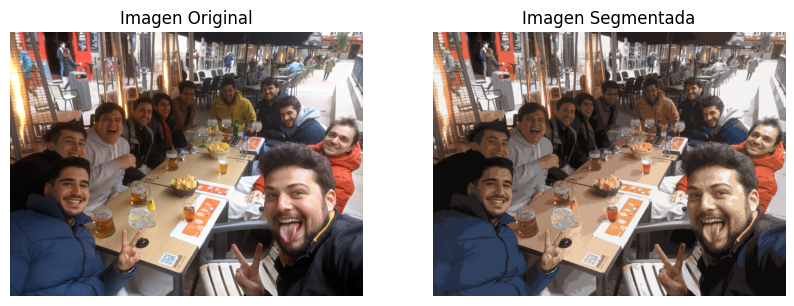

In [27]:
# Visualizar la imagen original
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image)
plt.axis('off')

# Visualizar la imagen segmentada
plt.subplot(1, 2, 2)
plt.title('Imagen Segmentada')
plt.imshow(imagen_segmentada)
plt.axis('off')


In [25]:
# shape después del reshape
imagen_segmentada.shape

(3981312, 3)

In [30]:
plt.imsave('imagen_segmentada.jpg', imagen_segmentada)


#### 7. Imprime y guarda en tu ordenador la imagen resultante

In [ ]:
# muestra el array de la nueva imagen

array([[[149.57894707, 110.93179241,  85.85839786],
        [149.57894707, 110.93179241,  85.85839786],
        [149.57894707, 110.93179241,  85.85839786],
        ...,
        [229.12114191, 218.99208548, 215.54048558],
        [229.12114191, 218.99208548, 215.54048558],
        [190.26627889, 188.24640849, 191.7198782 ]],

       [[149.57894707, 110.93179241,  85.85839786],
        [149.57894707, 110.93179241,  85.85839786],
        [149.57894707, 110.93179241,  85.85839786],
        ...,
        [229.12114191, 218.99208548, 215.54048558],
        [229.12114191, 218.99208548, 215.54048558],
        [190.26627889, 188.24640849, 191.7198782 ]],

       [[149.57894707, 110.93179241,  85.85839786],
        [149.57894707, 110.93179241,  85.85839786],
        [149.57894707, 110.93179241,  85.85839786],
        ...,
        [229.12114191, 218.99208548, 215.54048558],
        [229.12114191, 218.99208548, 215.54048558],
        [190.26627889, 188.24640849, 191.7198782 ]],

       ...,

      

In [ ]:
# muestra la nueva imagen por pantalla

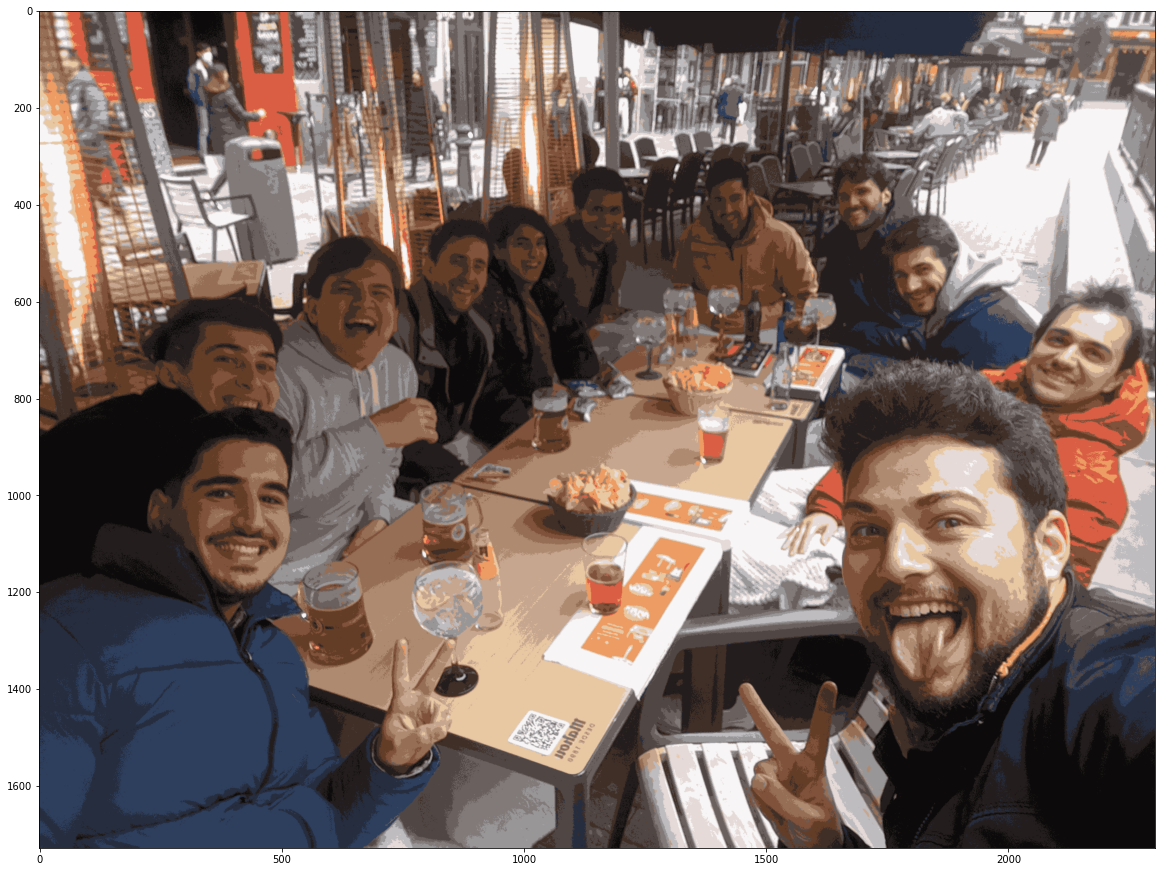

In [26]:
# fig = plt.figure(figsize=(20,20))
# plt.imshow(segmented_img.astype('uint8')) # fijate en esto hay que hacerle un astype para que se fume la imagen
# fig.savefig('mi_imagen.jpg')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [28]:
def cluster_colors(archivo_imagen, nombre_fichero, n_colors=10, save=False):
    image = imread(archivo_imagen)
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    fig = plt.figure(figsize=(20,20))
    plt.imshow(segmented_img.astype('uint8'))
    if save:
        fig.savefig(nombre_fichero)
        
# de nada :)


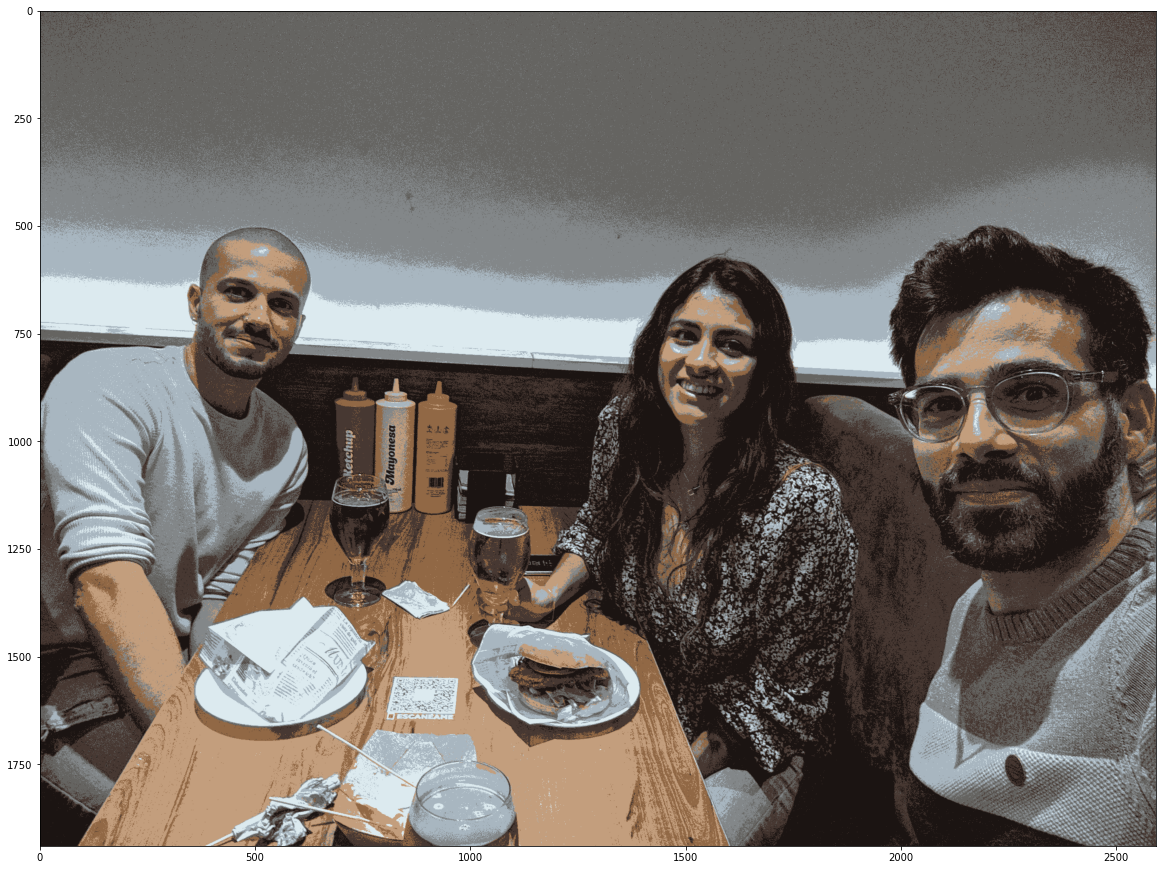

In [30]:
cluster_colors('data/picture_2.jpg', 'mi_imagen_2.jpg', n_colors=8, save=True)